<a href="https://colab.research.google.com/github/kimpooreum-hub/Final-Team3/blob/main/%EA%B0%80%EC%84%A4_%EA%B2%80%EC%A6%9D(%EA%B9%80%ED%91%B8%EB%A6%84).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

df= pd.read_csv('/content/airbnb_2024_praha.csv')

/tmp/ipython-input-3262421994.py:8: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/content/airbnb_2024_praha.csv')


In [ ]:
df

,id,name,listing_url,description,room_type,accommodates,amenities,bathrooms,bedrooms,beds,...,neighborhood_overview_binary,is_private,price_per_person,night_flexibility,scaled_night_flexibility,host_about_bool,host_description_length,description_length,nearest_center,center_distance
0,23163,Residence Karolina - KAROL12,https://www.airbnb.com/rooms/23163,"Unique and elegant apartment rental in Prague,...",Entire home/apt,4.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Dedic...",1.0,1.0,2.0,...,False,True,988.75,364,0.040453,True,1282,248,Old Town Square,0.473723
1,23169,Residence Masna - Masna302,https://www.airbnb.com/rooms/23169,Masna studio offers a lot of space and privacy...,Entire home/apt,3.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Dedic...",1.0,1.0,2.0,...,False,True,985.00,364,0.040453,True,1282,249,Old Town Square,0.369269
2,26755,Central Prague Old Town Top Floor,https://www.airbnb.com/rooms/26755,Big and beautiful new attic apartment in the v...,Entire home/apt,4.0,"[""Hair dryer"", ""Free washer \u2013 In unit"", ""...",1.5,1.0,2.0,...,True,True,805.75,697,0.077462,True,295,241,Old Town Square,0.894490
3,30762,Residence Rybna - Rybna23,https://www.airbnb.com/rooms/30762,"We offer a modern, comfortable, serviced apart...",Entire home/apt,6.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Shamp...",1.0,2.0,3.0,...,False,True,1123.50,364,0.040453,True,1282,248,Old Town Square,0.555378
4,42514,"""NEWLY FURNISHED"" 1BR near Pachtuv Palace,Old ...",https://www.airbnb.com/rooms/42514,*NEWLY* Furnished 1-bedroom apartment on the f...,Entire home/apt,3.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Dedic...",1.0,1.0,2.0,...,False,True,921.00,358,0.039787,True,243,276,Old Town Square,0.575286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,980955134466832936,Rental unit in Praha 8 · ★New · 1 bedroom · 4 ...,https://www.airbnb.com/rooms/980955134466832936,Nechajte sa uniesť jednoduchosťou tohto pokojn...,Entire home/apt,4.0,"[""Free parking on premises"", ""Kitchen"", ""Carbo...",NaN,1.0,4.0,...,False,True,600.00,364,0.040453,False,0,83,Old Town Square,1.624407
10140,981052671610489770,Bed and breakfast in Praha 7 · ★New · 1 bedroo...,https://www.airbnb.com/rooms/981052671610489770,Capsule hostel is the future of travelers. It ...,Private room,1.0,"[""Freezer"", ""Smoke alarm"", ""Self check-in"", ""D...",NaN,1.0,1.0,...,False,False,523.00,6,0.000667,True,75,437,Old Town Square,3.123118
10141,981147682732529851,Rental unit in Praha 5 · ★New · 1 bedroom · 2 ...,https://www.airbnb.com/rooms/981147682732529851,Enjoy your Prague holiday in my modern and cos...,Entire home/apt,4.0,"[""Free driveway parking on premises \u2013 1 s...",NaN,1.0,2.0,...,True,True,589.25,363,0.040342,True,410,334,Dancing House,1.378710
10142,981241350406265221,Rental unit in Praha 1 · ★New · 1 bedroom · 1 ...,https://www.airbnb.com/rooms/981241350406265221,Спокойно планируйте маршруты: жилье расположен...,Private room,2.0,"[""Dedicated workspace"", ""Wifi"", ""Kitchen""]",NaN,1.0,1.0,...,False,False,570.50,364,0.040453,False,0,61,Old Town Square,1.149341


In [ ]:
#levene 검증을 통한 분산 확인

df_super = df.loc[df['host_is_superhost'] == True, 'reviews_per_month'].dropna()
df_regular = df.loc[df['host_is_superhost'] == False, 'reviews_per_month'].dropna()

levene_val = stats.levene(df_super, df_regular, center='median')
print(levene_val)

LeveneResult(statistic=np.float64(189.1077344977387), pvalue=np.float64(1.2001772766171061e-42))


In [ ]:
# reviews_per_month → 수치형 변환(str-> float)
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'], errors='coerce').fillna(0)

# 그룹 분리 (True = 슈퍼호스트, False = 일반호스트)
group1 = df.loc[df['host_is_superhost'] == True, 'reviews_per_month']
group2 = df.loc[df['host_is_superhost'] == False, 'reviews_per_month']

# Welch t-test
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=False)

print("슈퍼호스트 평균:", group1.mean())
print("일반호스트 평균:", group2.mean())
print(f"Welch t-test 결과: t={t_stat:.3f}, p={p_val:.4g}")

슈퍼호스트 평균: 2.4800077599586134
일반호스트 평균: 1.3526919401083148
Welch t-test 결과: t=28.826, p=3.706e-173


Welch t-test 결과해석
- 슈퍼호스트의 평균리뷰수 2.48
- 일반호스트의 평균리뷰수 1.35
- t통계량 : 28.83
- p-value : 3.706e-173

  = p << 0.001 -> 차이가 통계적으로 유의하다

###**" 슈퍼호스트 여부는 리뷰수 차이에 의미있는 영향을 준다 "**



-----

##시각화 검증(박스플롯)

/tmp/ipython-input-3301258462.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2], labels=['Non-superhost','Superhost'], showfliers=True)


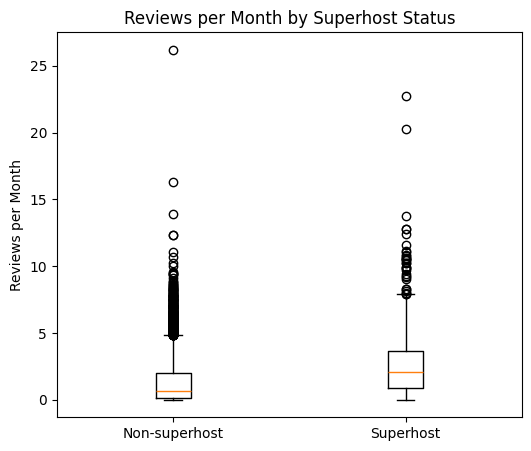

In [ ]:
import matplotlib.pyplot as plt

# 그룹 분리
group1 = df.loc[df['host_is_superhost'] == False, 'reviews_per_month']
group2 = df.loc[df['host_is_superhost'] == True, 'reviews_per_month']

plt.figure(figsize=(6,5))
plt.boxplot([group1, group2], labels=['Non-superhost','Superhost'], showfliers=True)
plt.title('Reviews per Month by Superhost Status')
plt.ylabel('Reviews per Month')
plt.show()

/tmp/ipython-input-2031395826.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2], labels=['Non-superhost','Superhost'], showfliers=True)


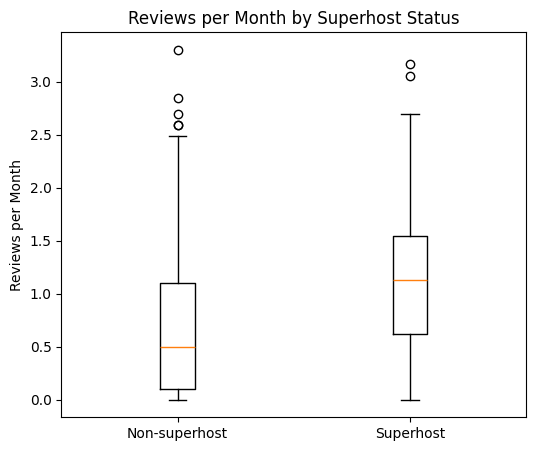

In [ ]:
# 중앙값과 사분위값 차이 더 명확하게 들어나게 하기위해서 log변환으로 왜도 보정
# 대부분의 숙소의 리뷰가 0-2에 머물지만 인기 숙소만 리뷰가 10개 이상으로 있는게 있어서 몰림

# 그룹 분리 + log1p 변환
group1 = np.log1p(df.loc[df['host_is_superhost'] == False, 'reviews_per_month'].astype(float).dropna())
group2 = np.log1p(df.loc[df['host_is_superhost'] == True,  'reviews_per_month'].astype(float).dropna())

# 박스플롯
plt.figure(figsize=(6,5))
plt.boxplot([group1, group2], labels=['Non-superhost','Superhost'], showfliers=True)
plt.title('Reviews per Month by Superhost Status')
plt.ylabel('Reviews per Month')
plt.show()